<a href="https://colab.research.google.com/github/vinosraj/codingdojo-exercise/blob/main/Project_1_Part_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Project 1- Part 3


*   Vino Raj
*   02/09/2022





In [2]:
import pandas as pd

filename = '/content/drive/MyDrive/Coding Dojo/02 Week 2 :Pandas/data/sales_predictions.csv'

df = pd.read_csv(filename)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
# 1. how many rows and columns
df. shape


(8523, 12)

In [4]:
# 2. What are the datatypes of each variable?

data_types = df.dtypes
data_types

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [5]:
# 3.Are there duplicates? If so, drop any duplicates.

df.duplicated().any()

False

In [6]:
#4 Identify missing values.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [8]:
null_vals = df.isna().sum()
null_vals[null_vals>0].index

Index(['Item_Weight', 'Outlet_Size'], dtype='object')

In [9]:
df['Item_Weight'].value_counts()

12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
          ..
7.275      2
7.685      1
9.420      1
6.520      1
5.400      1
Name: Item_Weight, Length: 415, dtype: int64

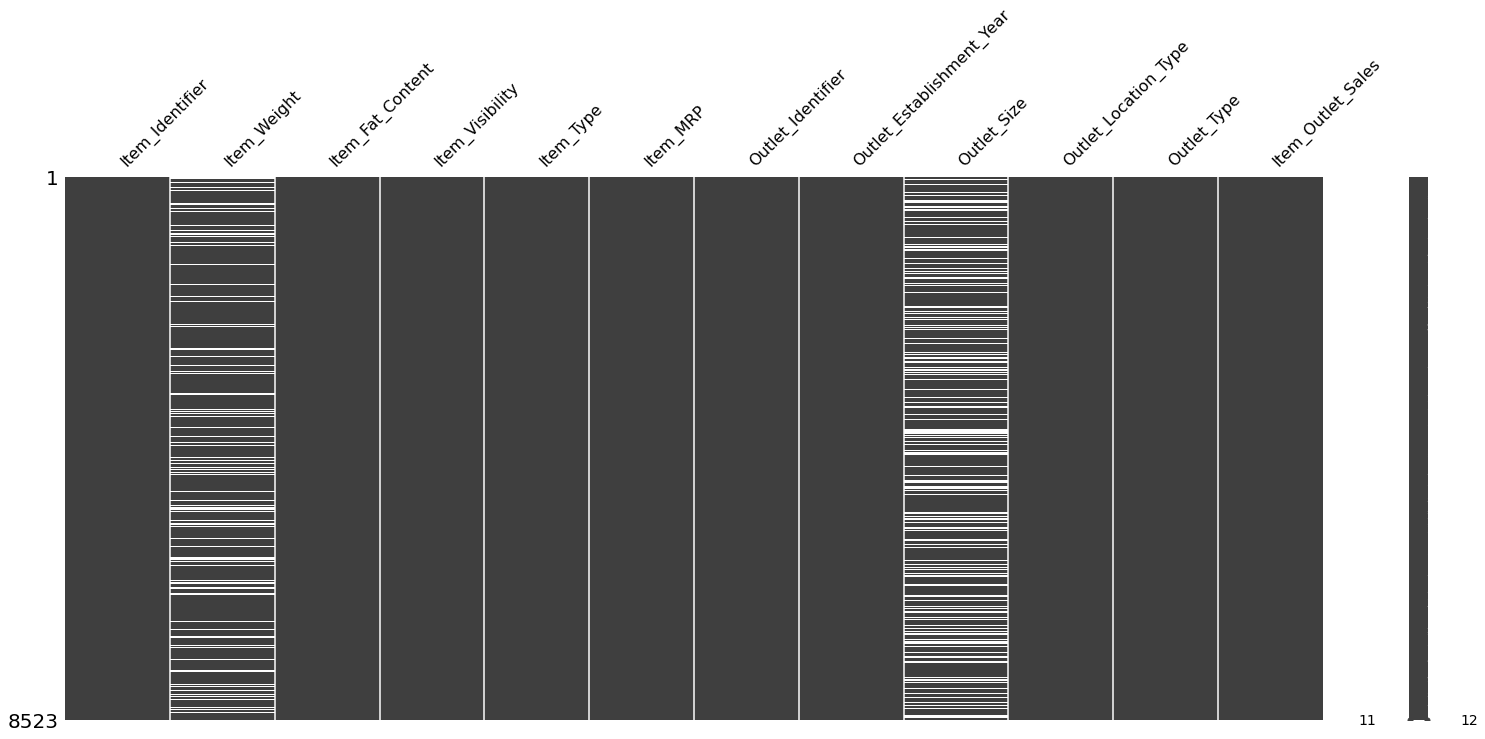

In [10]:
import missingno 
missingno.matrix(df)



Reasoning one

Considering on using the average weight of the missing items based on that type of good to fill the missing values for the item weight

In [11]:
#item_avg_weight = 
df.pivot_table(values='Item_Weight', index='Item_Type')


,Item_Weight
Item_Type,
Baking Goods,12.277108
Breads,11.346936
Breakfast,12.768202
Canned,12.305705
Dairy,13.426069
Frozen Foods,12.867061
Fruits and Vegetables,13.224769
Hard Drinks,11.400328
Health and Hygiene,13.142314


In [12]:
import numpy as np

df_group_mean = df.groupby('Item_Type').Item_Weight.transform(np.mean)


In [13]:
df_group_mean

0       13.426069
1       11.847460
2       12.817344
3       13.224769
4       13.384736
          ...    
8518    12.987880
8519    12.277108
8520    13.142314
8521    12.987880
8522    11.847460
Name: Item_Weight, Length: 8523, dtype: float64

In [14]:
#replacing the item weight based on item typ

df.Item_Weight.fillna(df_group_mean,inplace=True)

In [15]:
df[['Item_Type','Item_Weight']].value_counts()

Item_Type              Item_Weight
Fruits and Vegetables  13.224769      213
Snack Foods            12.987880      212
Household              13.384736      151
Frozen Foods           12.867061      138
Dairy                  13.426069      116
                                     ... 
Health and Hygiene     12.850000        1
Breads                 19.850000        1
Meat                   15.200000        1
Frozen Foods           9.420000         1
Hard Drinks            16.750000        1
Length: 1197, dtype: int64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [17]:
null_vals = df.isna().sum()
null_vals[null_vals>0].index

Index(['Outlet_Size'], dtype='object')

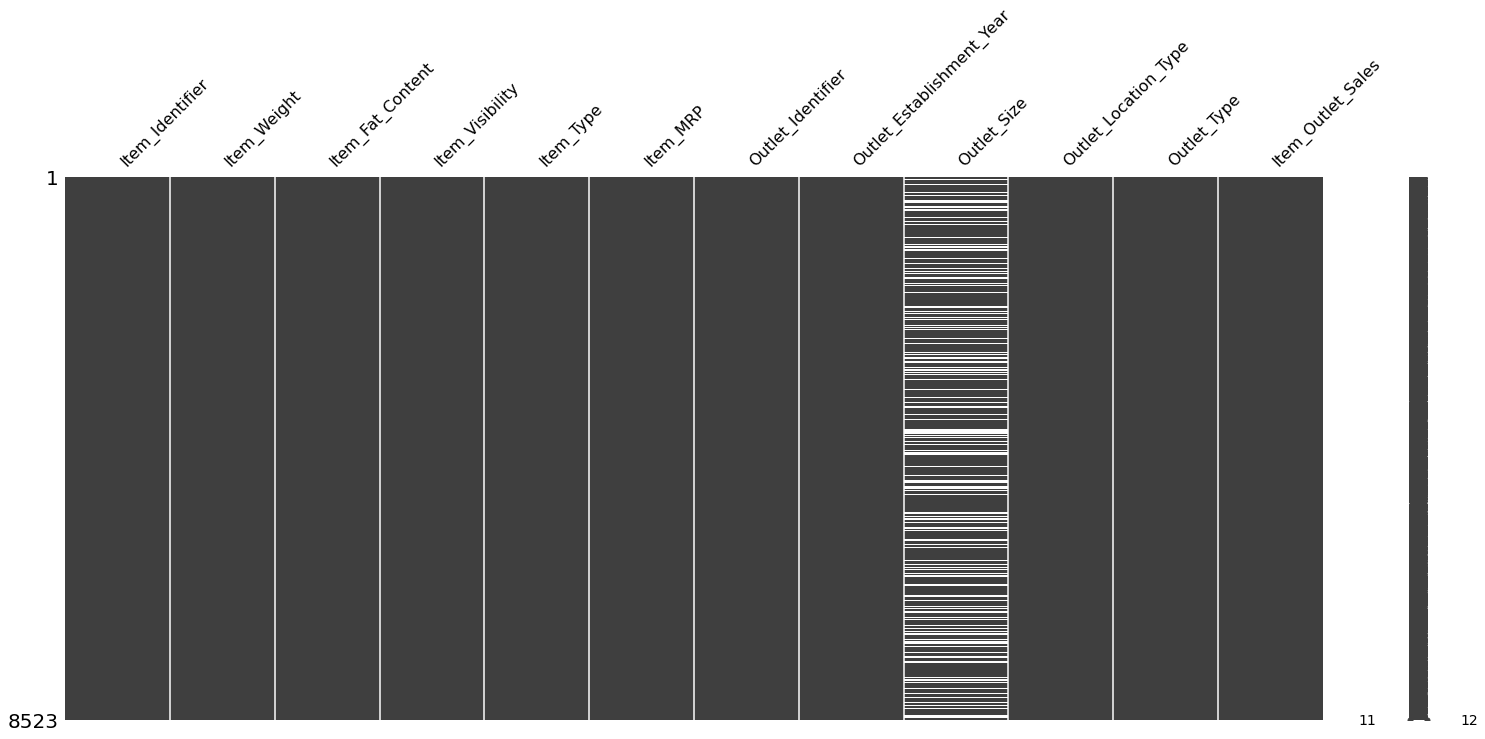

In [18]:
missingno.matrix(df)

In [19]:
df['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [20]:
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [21]:
df['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [22]:
df.groupby(['Outlet_Size']).count()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Outlet_Size,,,,,,,,,,,
High,932,932,932,932,932,932,932,932,932,932,932
Medium,2793,2793,2793,2793,2793,2793,2793,2793,2793,2793,2793
Small,2388,2388,2388,2388,2388,2388,2388,2388,2388,2388,2388


In [23]:
df[['Outlet_Size','Outlet_Type']].value_counts()

Outlet_Size  Outlet_Type      
Small        Supermarket Type1    1860
Medium       Supermarket Type3     935
High         Supermarket Type1     932
Medium       Supermarket Type1     930
             Supermarket Type2     928
Small        Grocery Store         528
dtype: int64

The best way i can think based on looking at the above data to fill the missing data for outlet_size would be if i could find the mode of outlet_size based on outlet_type, we would get the best picks for missing outlet_size.

In [24]:
# i found a similar code for what i want to do so incoorperating it into our problem

#Import mode function:
from scipy.stats import mode

#Find mode for each outlet size based off of outlet type
outlet_size_mode = df.pivot_table(values='Outlet_Size', columns='Outlet_Type',aggfunc=(lambda x:mode(x).mode[0]) )
display(outlet_size_mode)



Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [25]:
#boolean for missing Item_Weight values
miss_bool = df['Outlet_Size'].isnull() 
display(miss_bool)


0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool

In [26]:
#Imputing data 

df.loc[miss_bool,'Outlet_Size'] = df.loc[miss_bool,'Outlet_Type'].apply(lambda x: outlet_size_mode[x])

In [27]:
#6 comfirming no missing values.

In [28]:
null_vals = df.isna().sum()
null_vals[null_vals>0].index

Index([], dtype='object')

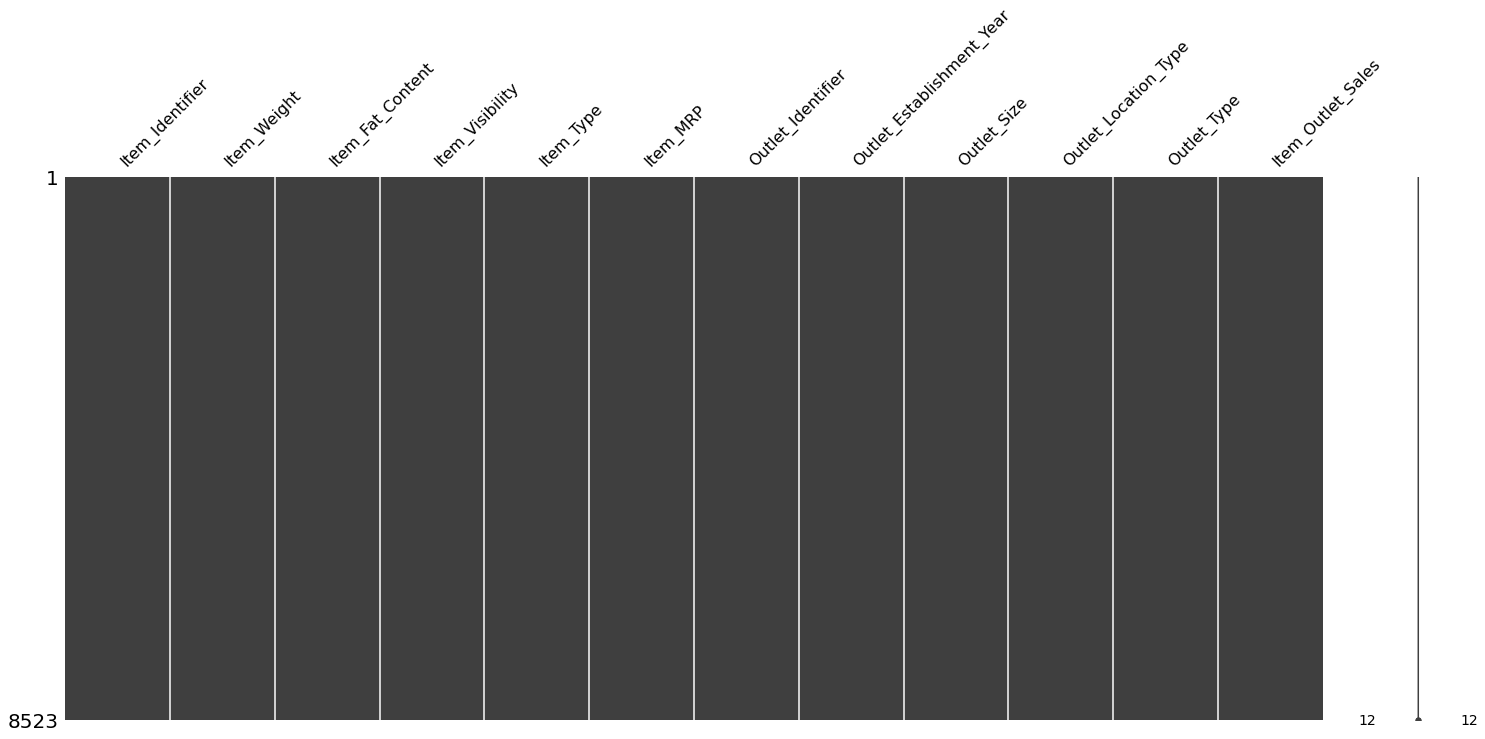

In [29]:
missingno.matrix(df)

Finding in consistant catergories



In [30]:
#6

In [31]:
data_types = df.dtypes
str_cols = data_types[ data_types=='object'].index
str_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [32]:
for col in str_cols:
    print(f'- {col}:')
    print(df[col].value_counts(dropna=False))
    print("\n\n")

- Item_Identifier:
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64



- Item_Fat_Content:
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64



- Item_Type:
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64



- Outlet_Identifier:
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    9

#naming error for:
Item_Fat_Content:

Low Fat   
Regular    
LF          
reg         
low fat     

In [33]:

repl_map ={'LF':'Low Fat',
           'low fat': 'Low Fat',
           'reg':'Regular'}

df['Item_Fat_Content'] = df['Item_Fat_Content'].replace(repl_map)
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [34]:
#7 Statistical summary for numerical columns

In [35]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857890,0.066132,140.992782,1997.831867,2181.288914
std,4.232804,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.867061,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [36]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


##Data Visualization 

Histogram to view the distributions of various features in your dataset.

Boxplot to view statistical summaries of various features in your dataset.

Heatmap of the correlation between features.

1. What is the most selling item type in this data set? Histogram to visualize

In [37]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [38]:
df.groupby('Item_Type').sum()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Type,,,,,
Baking Goods,7955.566119,44.821706,81894.7364,1294528,1.265525e+06
Breads,2848.081005,16.630030,35379.1198,501412,5.532372e+05
Breakfast,1404.502247,9.429531,15596.6966,219707,2.322990e+05
Canned,7986.402551,44.215926,90706.7270,1296801,1.444151e+06
Dairy,9156.578993,49.395349,101276.4596,1362419,1.522594e+06
Frozen Foods,11014.204457,56.192325,118558.8814,1710309,1.825735e+06
Fruits and Vegetables,16292.915878,84.407946,178124.0810,2461191,2.820060e+06
Hard Drinks,2439.670164,13.897707,29334.6766,427610,4.577934e+05
Health and Hygiene,6834.003256,28.712309,68025.8388,1038822,1.045200e+06


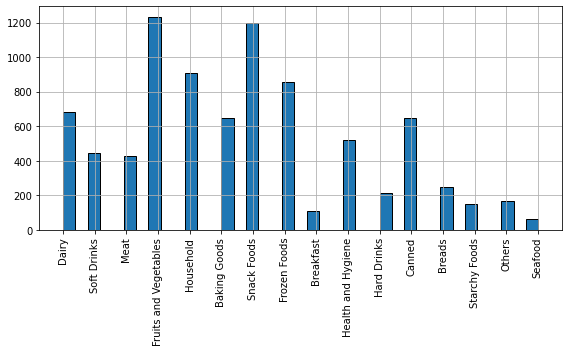

In [85]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (8,5)

df['Item_Type'].hist(bins='auto', edgecolor="black")

plt.xticks(rotation=90)
plt.tight_layout()

Most selling items are Fruits & vegetables and Snack foods.

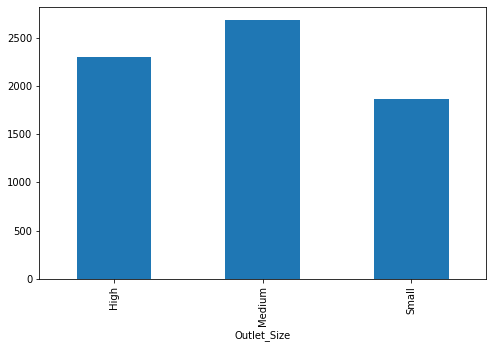

In [95]:
df.groupby('Outlet_Size')['Item_Outlet_Sales'].mean().plot.bar()

Interestingly medium size stores seem to have the highest average sales.

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


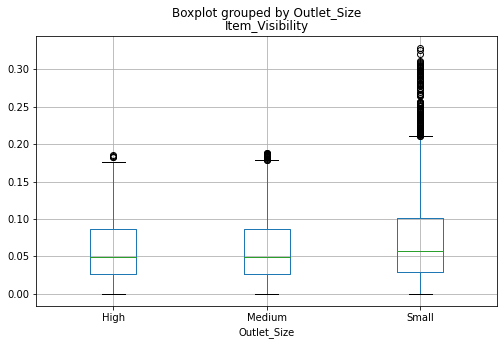

In [77]:
df.boxplot(column='Item_Visibility', by ='Outlet_Size')

Item Visibility doesnt change based on the size of the estabilishment.

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


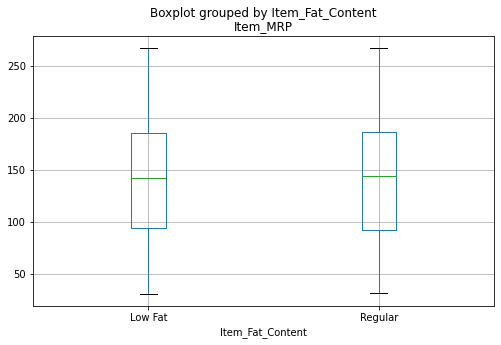

In [83]:
df.boxplot(column='Item_MRP', by ='Item_Fat_Content');

In [72]:
corr = df.corr()

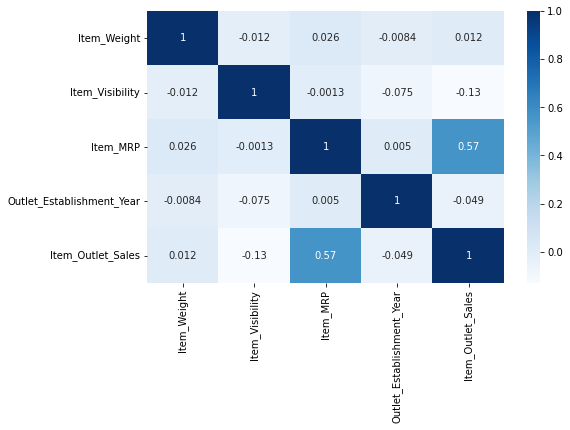

In [75]:
import seaborn as sns

sns.heatmap(corr, cmap = 'Blues', annot = True)

There is a moderate correlation between Maximum retail price and  sale of the product in a particular store. 

I was expecting a correlation between Item visibility and Sale of the product. But there isnt a correlation.